# Python library for Distributions

<p style="background:w">
<code style="background:magenta;color:white">reliability
</code>
</p>
Documentation: <a href="https://reliability.readthedocs.io/en/latest/">https://reliability.readthedocs.io/en/latest/</a>
<p style="background:w">
<code style="background:white;color:magenta">pip install reliability
</code>
</p>

In [1]:
import os
import os.path as op

import numpy as np
import pandas as pd
from scipy.io import loadmat

# matplotlib
import matplotlib.pyplot as plt

# reliability
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Everything, Fit_Exponential_1P
from reliability.Probability_plotting import plot_points
from reliability.Other_functions import make_right_censored_data, histogram


## 1. Input Precipitation 

### 1.1. Load Dataset <a class="anchor" id="11"></a>

In [2]:
# path
p_db = op.join(os.getcwd(),'..','..','data','Precipitation_Cantabria')

# read database precipitation (xls file)
p_dat = op.join(p_db, '1083e_R.xls')

data = pd.read_excel(
    p_dat,
    header = None, 
    names = ['Precipitation']
)

# set dataframe time index
data.index =  np.arange('1970-10-01', '2003-10-01', dtype='datetime64[D]')
data.index.name = 'time'


### 1.2. Apply threshold to data

In [3]:
th = 0.1
data_th = data[['Precipitation']][data['Precipitation'] > th]

### 1.3. Fitting Exponential distribution to January data

In [4]:
data_jan = data_th.loc[data_th.index.month == 1]['Precipitation']

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 461/0 (0% right censored) 

   Distribution   Alpha     Beta   Gamma Alpha 1   Beta 1 Alpha 2     Beta 2 Proportion 1 DS      Mu   Sigma    Lambda  Log-likelihood    AICc     BIC       AD optimizer
     Weibull_CR                          10.3514 0.998681    64.5 2.0356e+07                                                  -1523.64 3055.37 3071.82 0.268785       TNC
 Exponential_2P                  0.11956                                                                     0.0978998        -1532.28 3068.58 3076.82 0.651234       TNC
       Gamma_3P 11.6677  0.87545 0.11956                                                                                      -1529.48 3065.02 3077.36   0.7466       TNC
     Weibull_3P 9.93092 0.936927 0.11956                                                                                      -1530.66 3067.38 3079.73 0.608197       TNC
 Exponential_1P                              

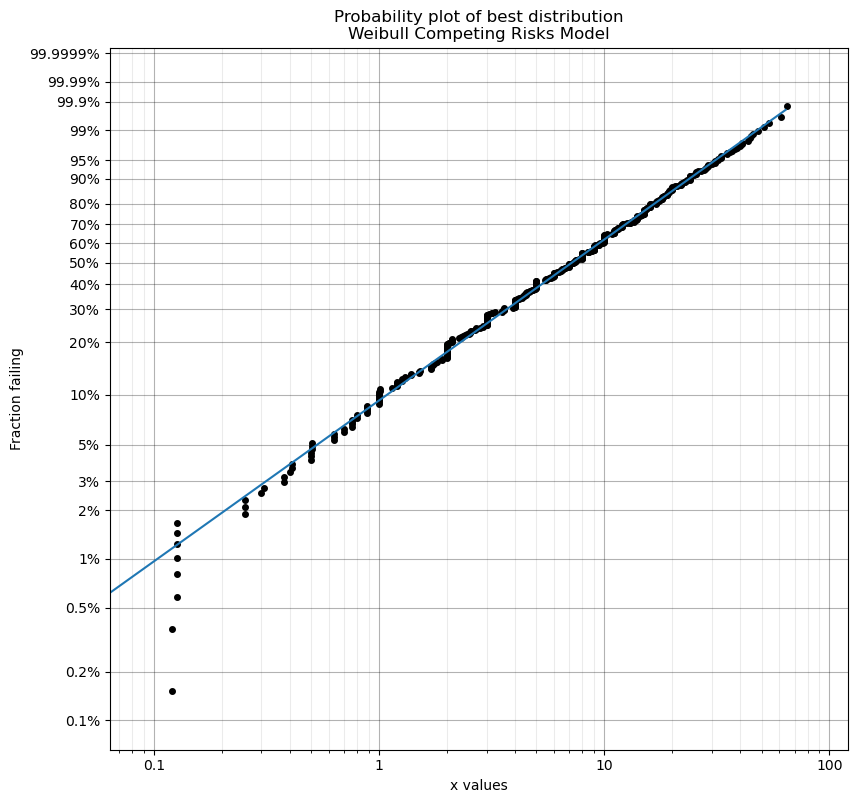

In [5]:
results = Fit_Everything(failures=data_jan.values, show_histogram_plot=False, show_probability_plot=False, show_PP_plot=False, show_best_distribution_probability_plot=True)  # fit all the models


### 1.4. Fitting Exponential distribution to montlhy data

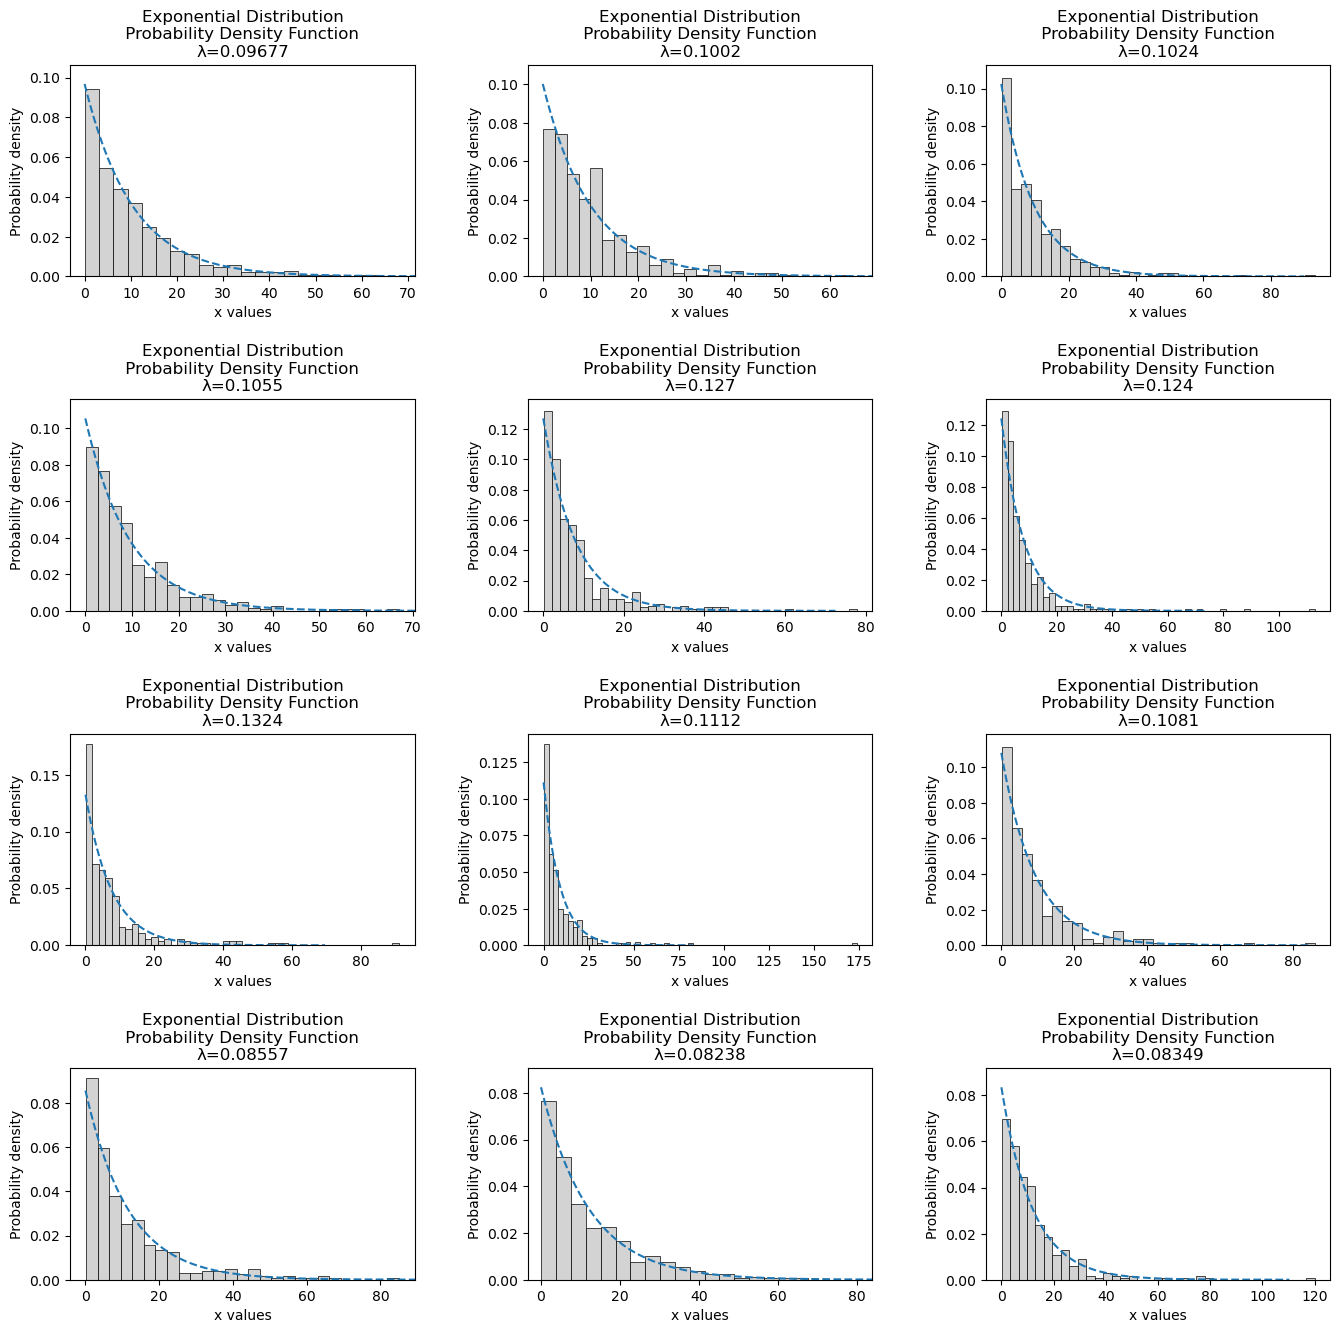

In [7]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig = plt.figure(figsize=(15, 15))

for p, month in enumerate(months):
    
    # move to next month
    ax = fig.add_subplot(4,3,p+1)
    
    # select month (label:month, position:p)
    raw_data = data_th.loc[data_th.index.month == p+1]['Precipitation'].values
    
    ex = Fit_Exponential_1P(failures=raw_data, show_probability_plot=False, print_results=False)
    histogram(raw_data) # generates the histogram using optimal bin width and shades the censored part as white
    ex.distribution.PDF(label='{0}'.format(month), linestyle='--')  # plots to PDF of the fitted Weibull_3P
    
plt.subplots_adjust(left=0.11, bottom=0.08, right=0.95, top=0.89, wspace=0.33, hspace=0.58)

### 1.5. Fitting available distributions to data

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 4700/0 (0% right censored) 

   Distribution   Alpha     Beta    Gamma Alpha 1   Beta 1 Alpha 2   Beta 2 Proportion 1 DS      Mu   Sigma   Lambda  Log-likelihood    AICc     BIC      AD optimizer
     Weibull_3P 9.31484 0.908005 0.102442                                                                                   -15371.4 30748.8 30768.1 3.85814       TNC
       Gamma_3P 11.2042 0.871583 0.102442                                                                                   -15380.1 30766.2 30785.6 5.12636       TNC
 Exponential_2P                  0.102442                                                                   0.102402        -15410.6 30825.2 30838.1 16.0001       TNC
Weibull_Mixture                           6.40867  1.07601 15.3486  1.03891     0.590211                                    -15415.4 30840.9 30873.1  2.1283       TNC
     Weibull_2P 9.59992 0.944629                           

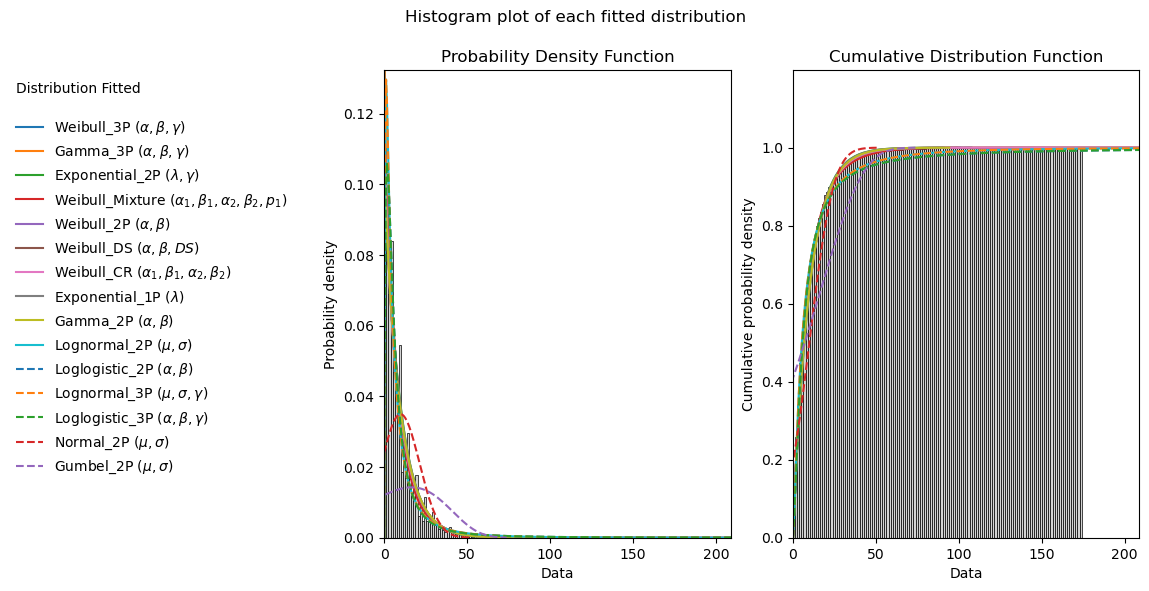

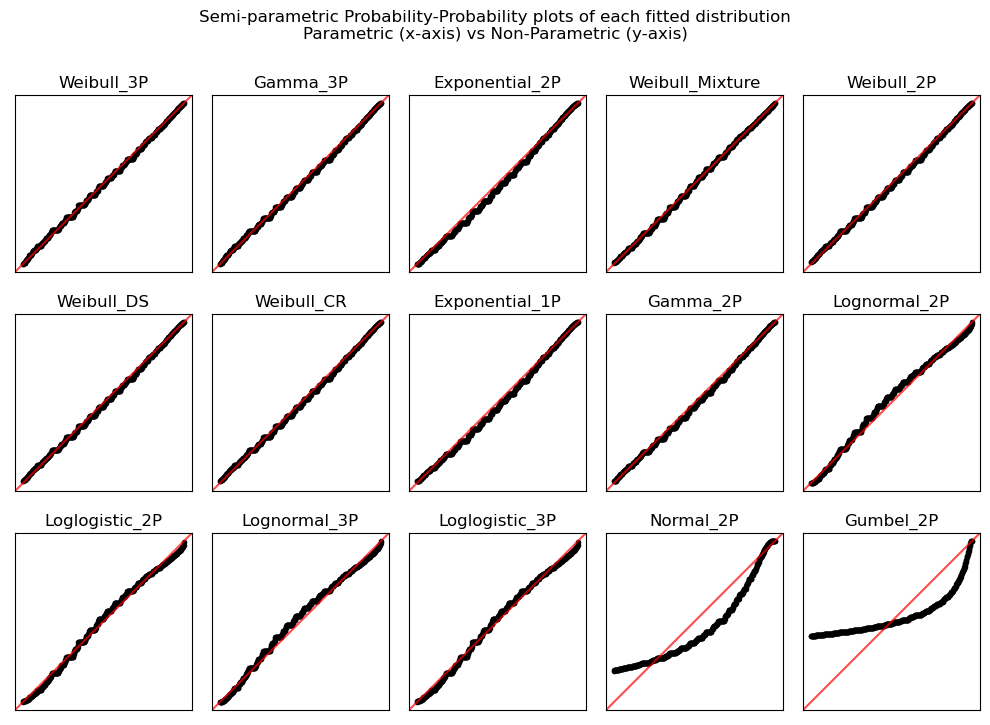

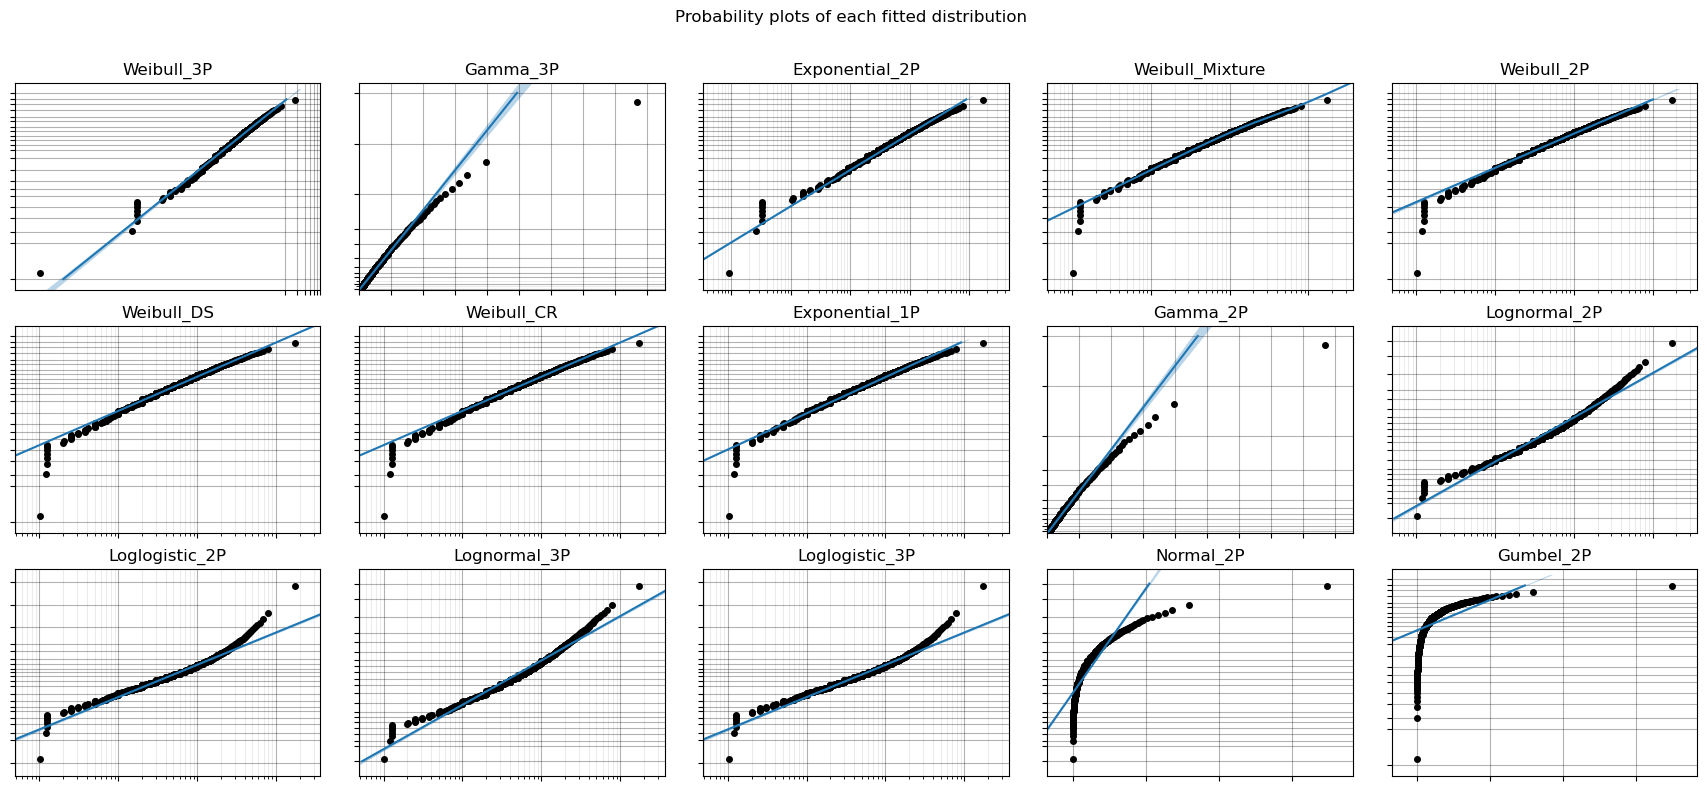

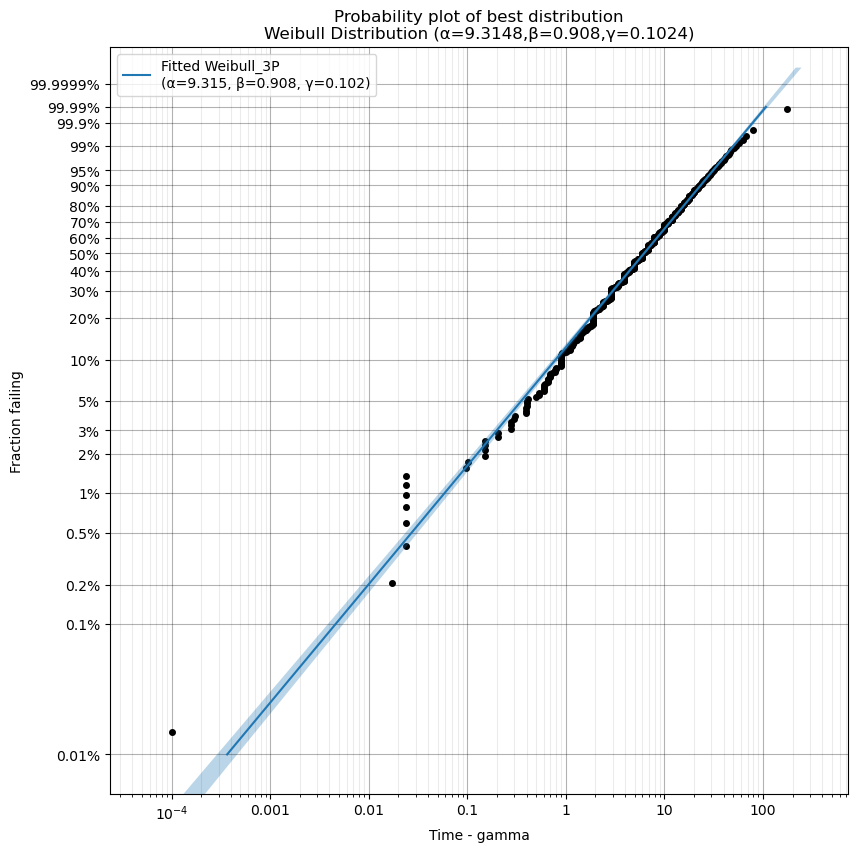

The best fitting distribution was Weibull_3P which had parameters [9.31484392 0.90800549 0.10244151]


In [8]:
raw_data = data_th['Precipitation'].values
results = Fit_Everything(failures=raw_data)  # fit all the models

print('The best fitting distribution was', results.best_distribution_name, 'which had parameters', results.best_distribution.parameters)


## 2. Input Waves

### 2.1 Load data

In [9]:
p_db = op.join(os.getcwd(),'..','..','data','Buoys')

# database waves (mat file)
p_dat = op.join(p_db, 'Bilbao-Vizcaya Ext.mat')

# database exploration
data_mat = loadmat(p_dat)

array = data_mat[list(data_mat.keys())[-1]]

data = pd.DataFrame(
    {
        'year': array[:,0],
        'month': array[:,1],
        'day': array[:,2],
        'hour': array[:,3],
        'hs': array[:,4],
    }
)
data['dates'] = pd.to_datetime(data[['year', 'month', 'day', 'hour']])
data = data.drop(['year', 'month', 'day', 'hour'], axis=1).set_index('dates')
data

,hs
dates,
1990-11-07 12:00:00,1.1
1990-11-07 15:00:00,1.1
1990-11-07 18:00:00,1
1990-11-07 21:00:00,1.2
1990-11-08 00:00:00,1.3
...,...
2009-07-19 01:00:00,1.9
2009-07-19 02:00:00,1.9
2009-07-19 03:00:00,1.8


### 2.2 Select March

In [10]:
data_mar = data.loc[data.index.month == 3]

### 2.3. Fitting available distributions to data

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 4374/0 (0% right censored) 

   Distribution    Alpha    Beta    Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS       Mu    Sigma   Lambda  Log-likelihood    AICc     BIC      AD optimizer
   Lognormal_3P                  0.149049                                                 0.697056 0.581852                 -6886.67 13779.3 13798.5 3.34509       TNC
   Lognormal_2P                                                                           0.780116  0.53633                 -6893.64 13791.3   13804 4.53631       TNC
       Gamma_3P  0.88363 2.41418 0.389959                                                                                   -6924.13 13854.3 13873.4 9.87516       TNC
 Loglogistic_3P  1.83674 2.71477 0.305576                                                                                   -6938.83 13883.7 13902.8 7.18279       TNC
 Loglogistic_2P   2.1681  3.2292                           

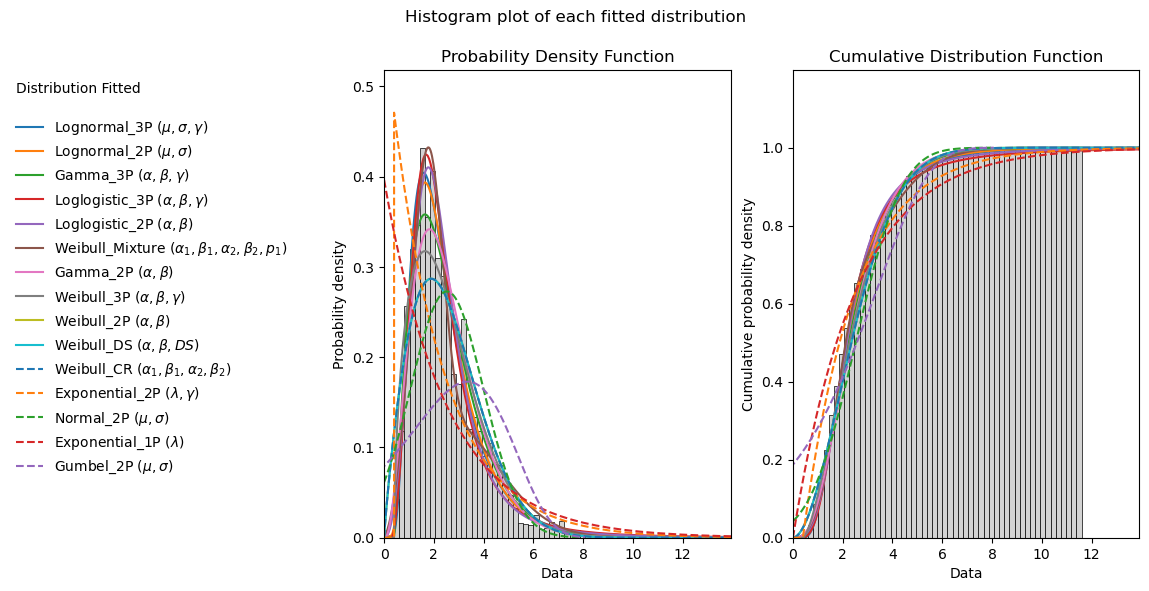

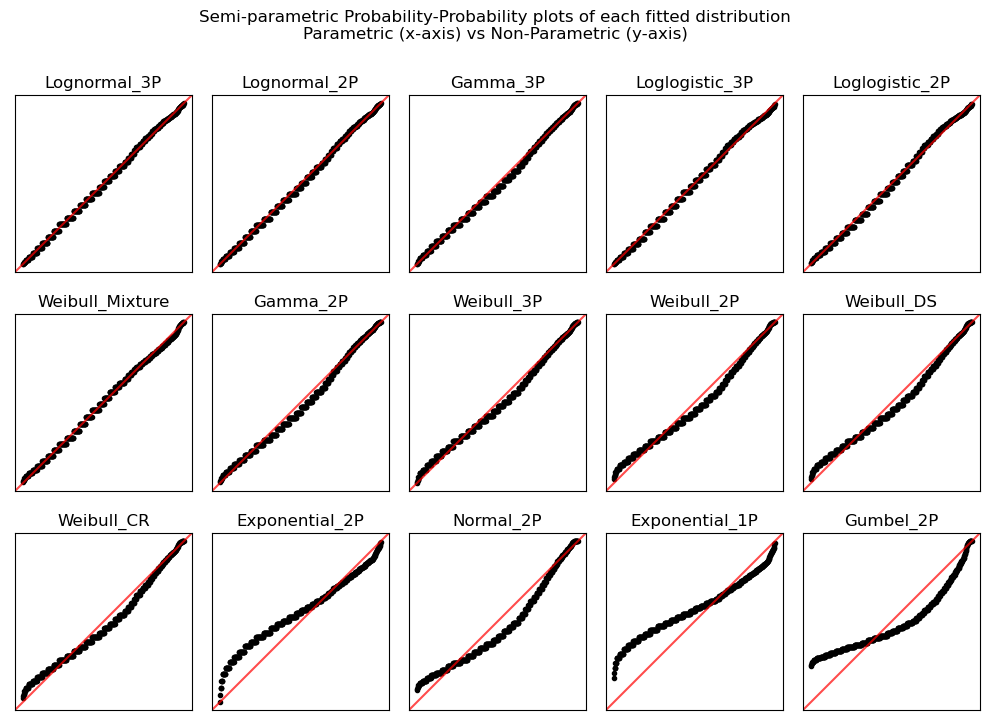

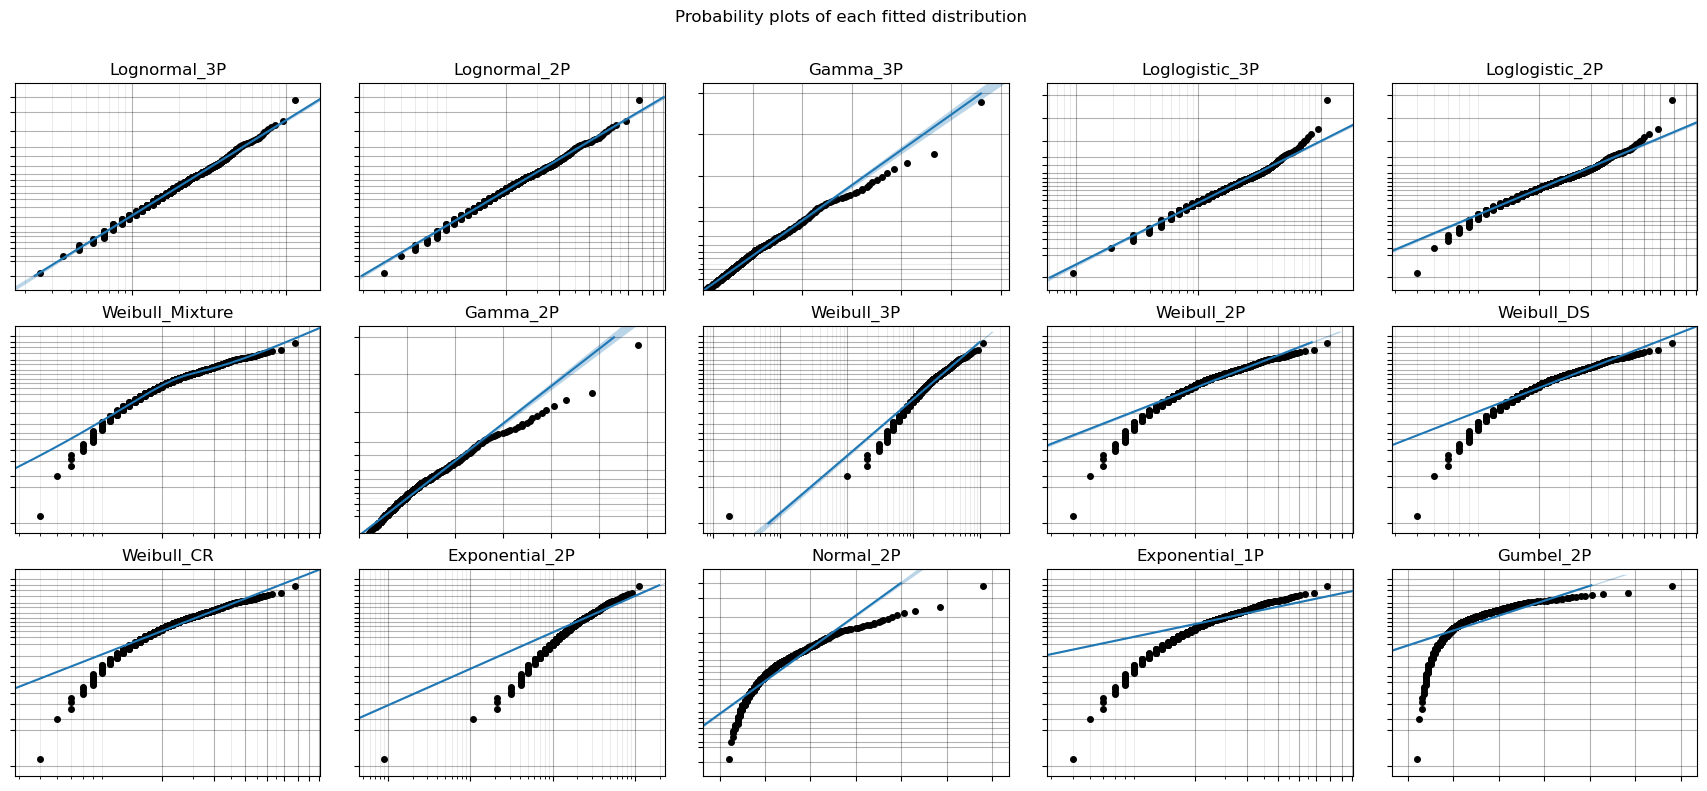

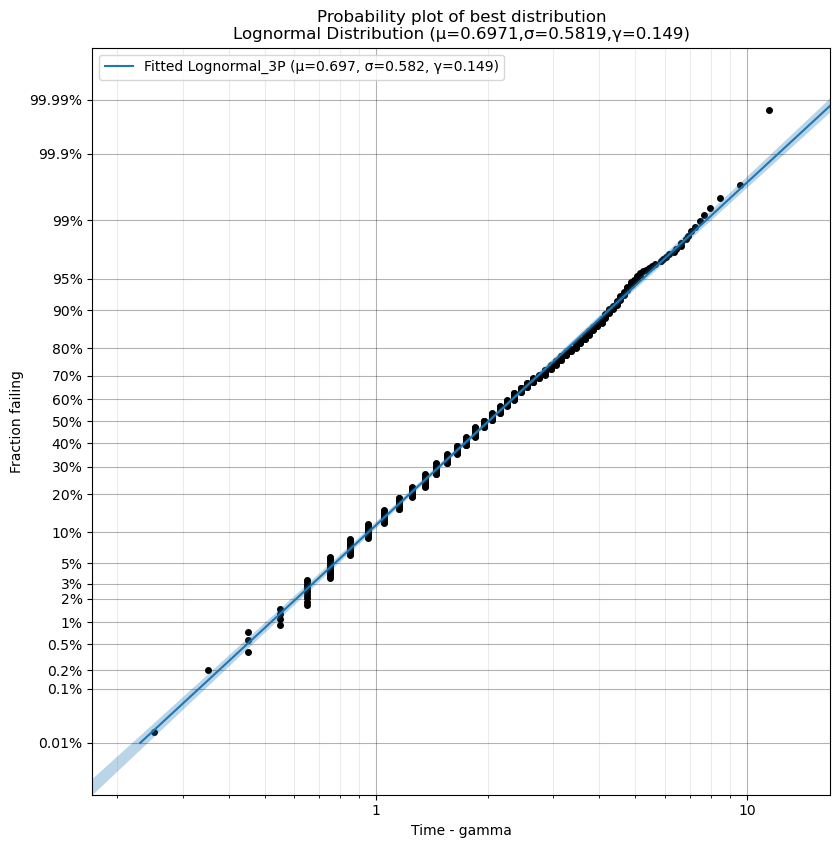

The best fitting distribution was Lognormal_3P which had parameters [0.69705567 0.5818523  0.14904939]


In [11]:
raw_data = data_mar['hs'].values
results = Fit_Everything(failures=raw_data)  # fit all the models

print('The best fitting distribution was', results.best_distribution_name, 'which had parameters', results.best_distribution.parameters)
